In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data
Bank=pd.read_csv("C:/Users/armaa/OneDrive/Documents/GitHub/Flip_robo_internship/Bank Marketing/termdeposit_train.csv")
Bank.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
Bank.shape

(31647, 18)

In [5]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
Bank.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
print("Missing Value:-",Bank.isnull().sum())

Missing Value:- ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [8]:
Categorical_col= Bank.select_dtypes(include='object')

In [9]:
Categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no
...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no


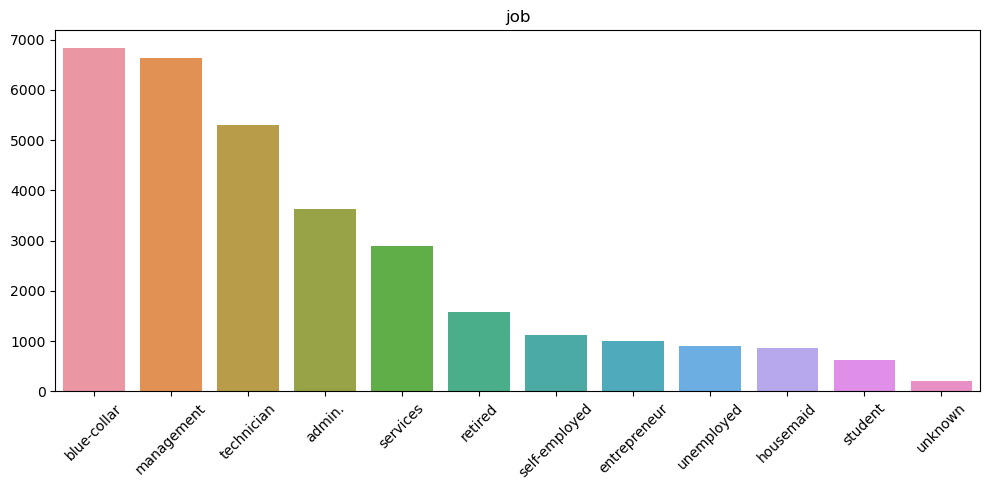

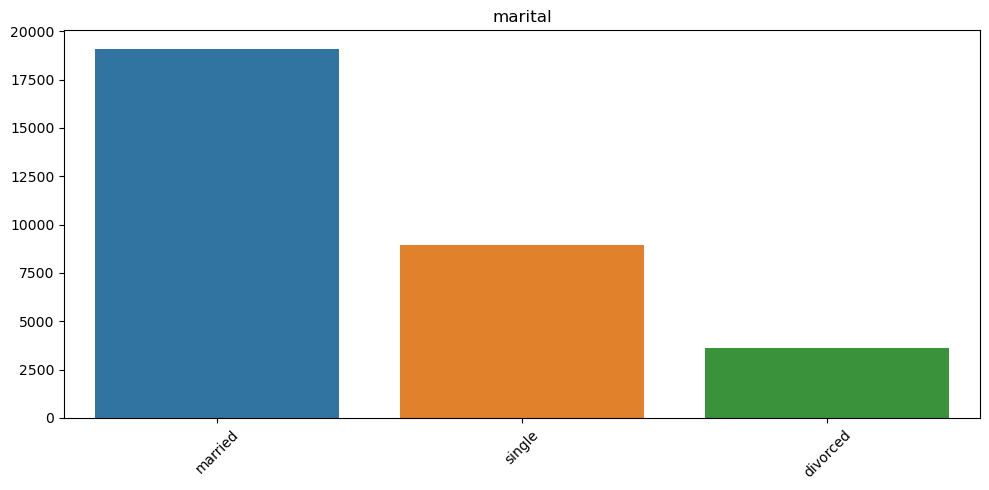

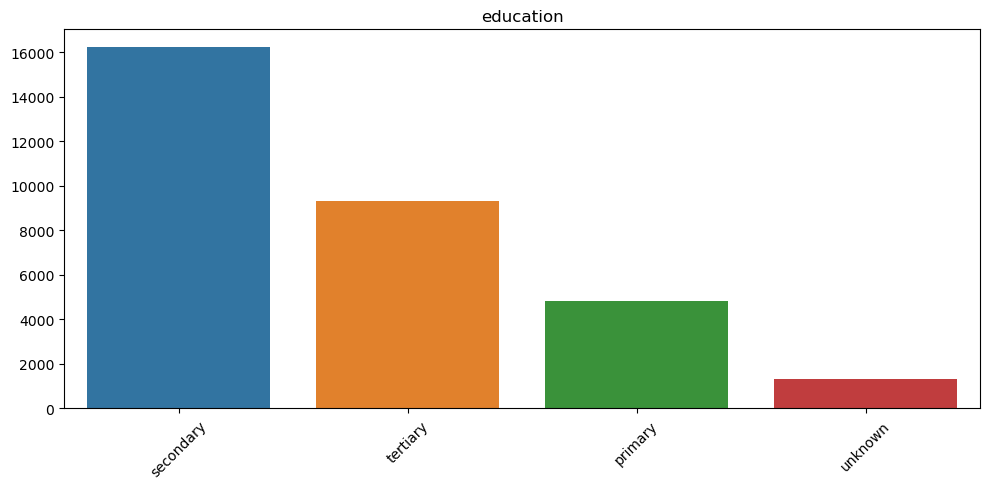

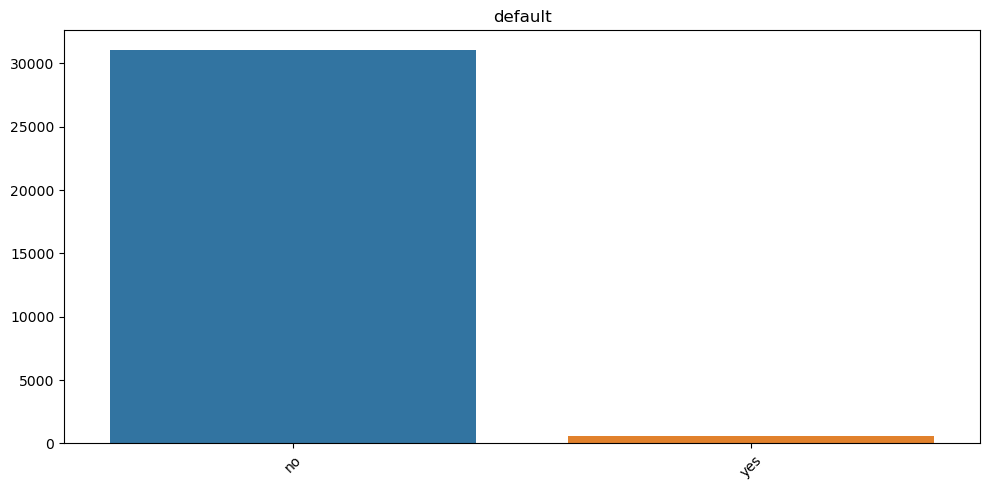

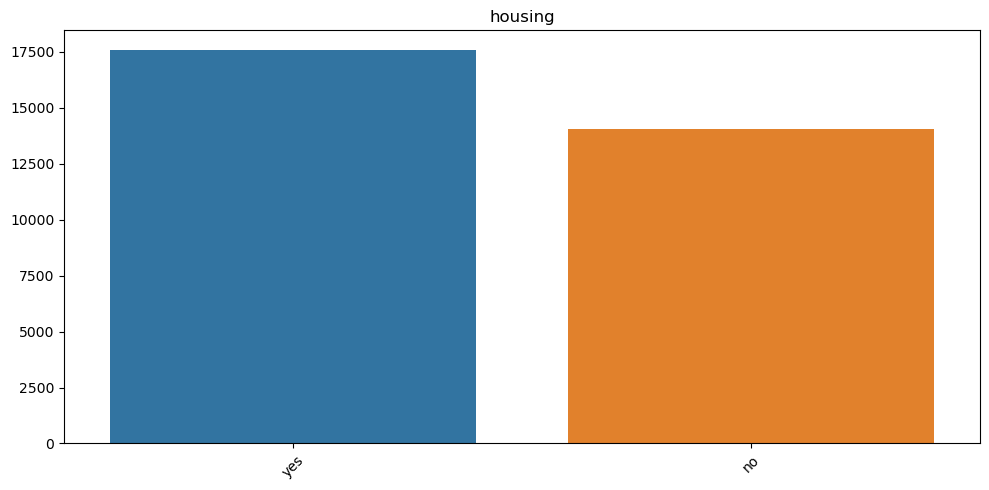

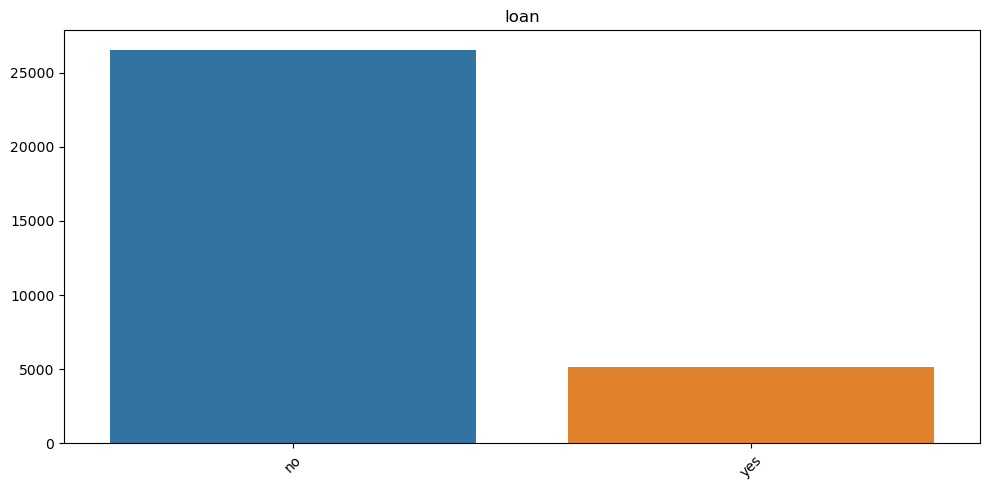

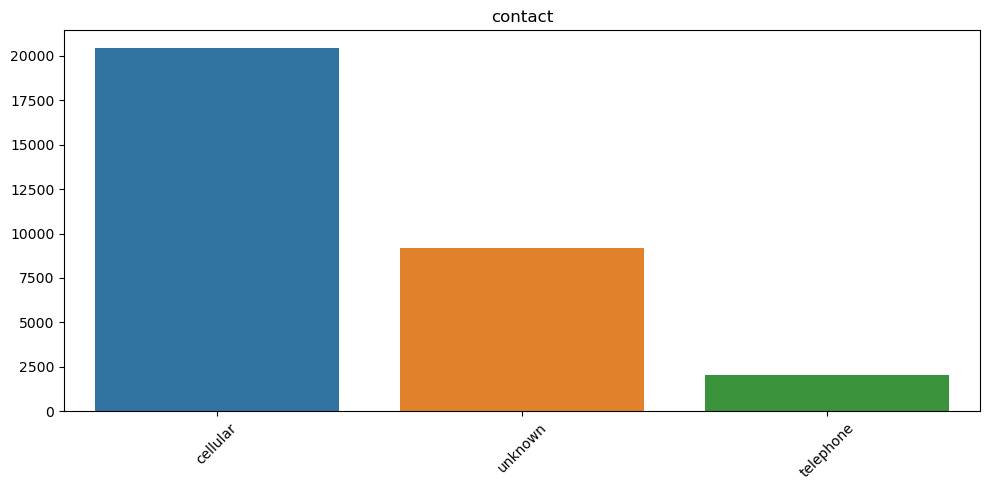

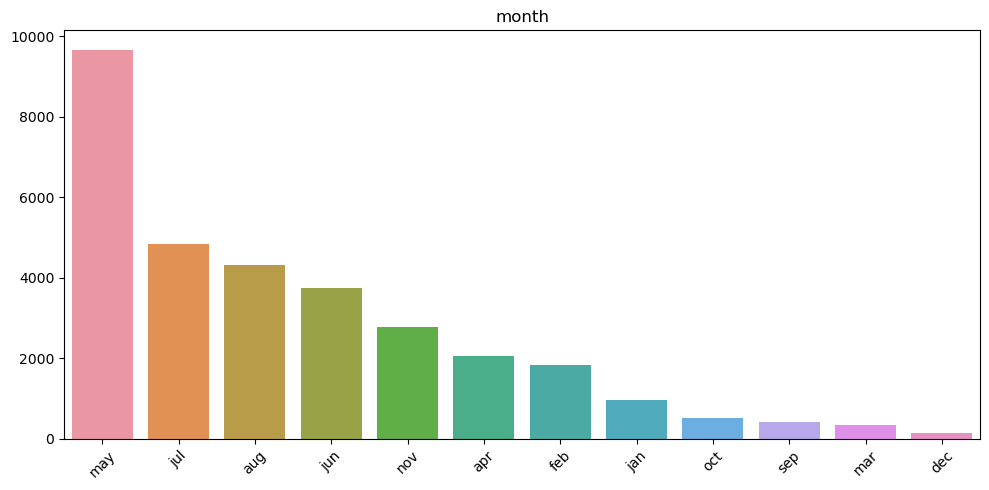

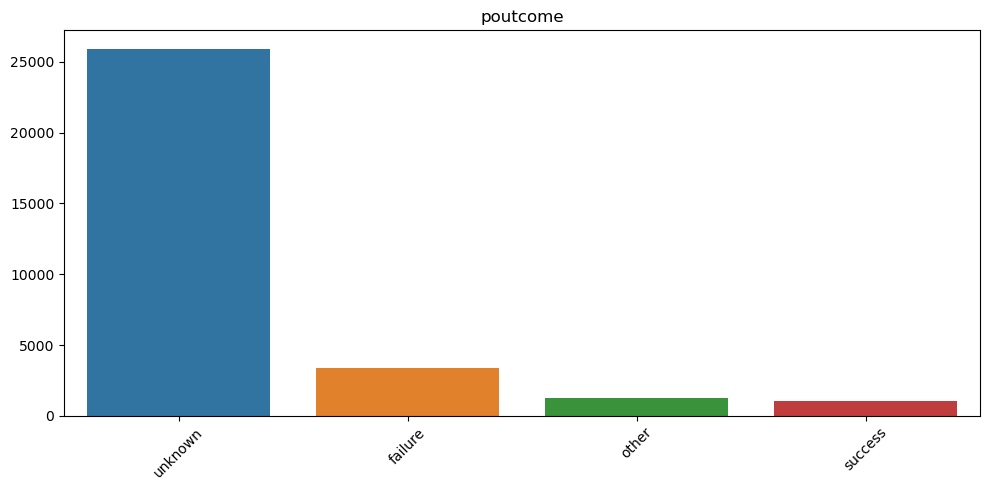

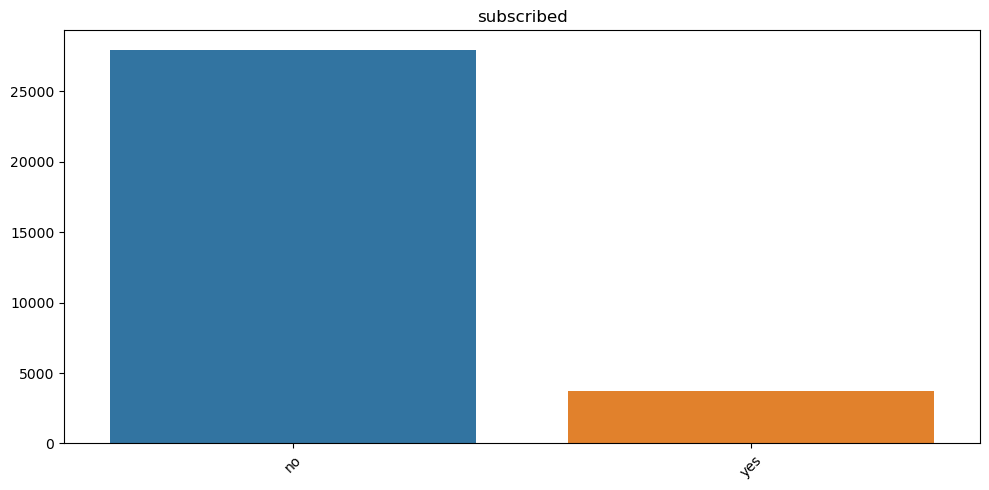

In [10]:
for col in Categorical_col:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=Bank[col].value_counts().index, y=Bank[col].value_counts().values)
    plt.title(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

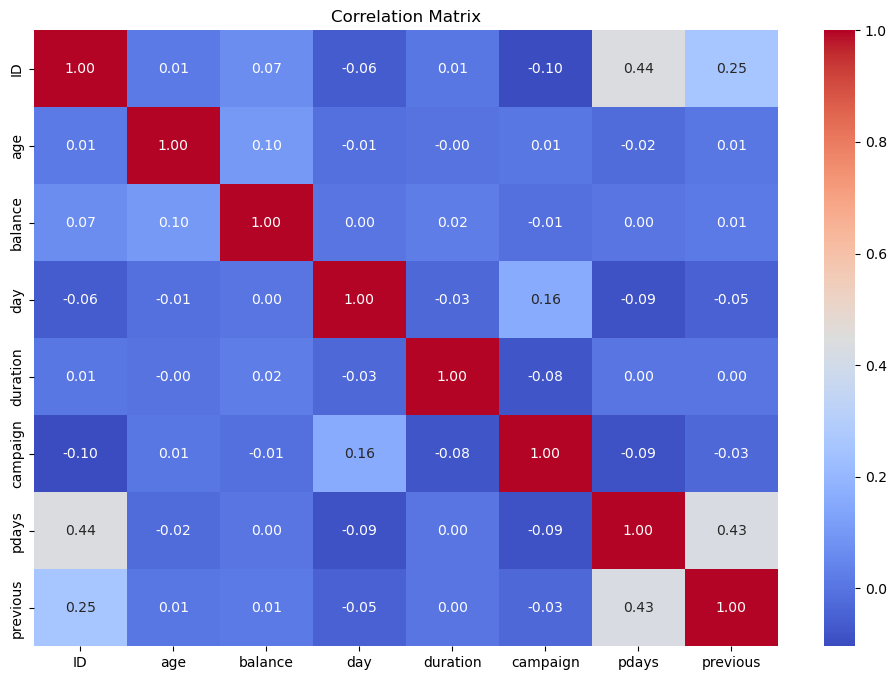

In [11]:
# Calculate correlation matrix
correlation_matrix = Bank.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

In [12]:
import seaborn as sns
corr = Bank.corr().round(3)
corr

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000,0.013,0.068,-0.063,0.007,-0.104,0.436,0.254
age,0.013,1.000,0.103,-0.011,-0.004,0.006,-0.022,0.006
balance,0.068,0.103,1.000,0.003,0.024,-0.012,0.002,0.014
day,-0.063,-0.011,0.003,1.000,-0.032,0.159,-0.088,-0.049
duration,0.007,-0.004,0.024,-0.032,1.000,-0.080,0.001,0.002
campaign,-0.104,0.006,-0.012,0.159,-0.080,1.000,-0.088,-0.033
pdays,0.436,-0.022,0.002,-0.088,0.001,-0.088,1.000,0.429
previous,0.254,0.006,0.014,-0.049,0.002,-0.033,0.429,1.000


Text(0.5, 1.05, 'Pearson Correlation of Feature')

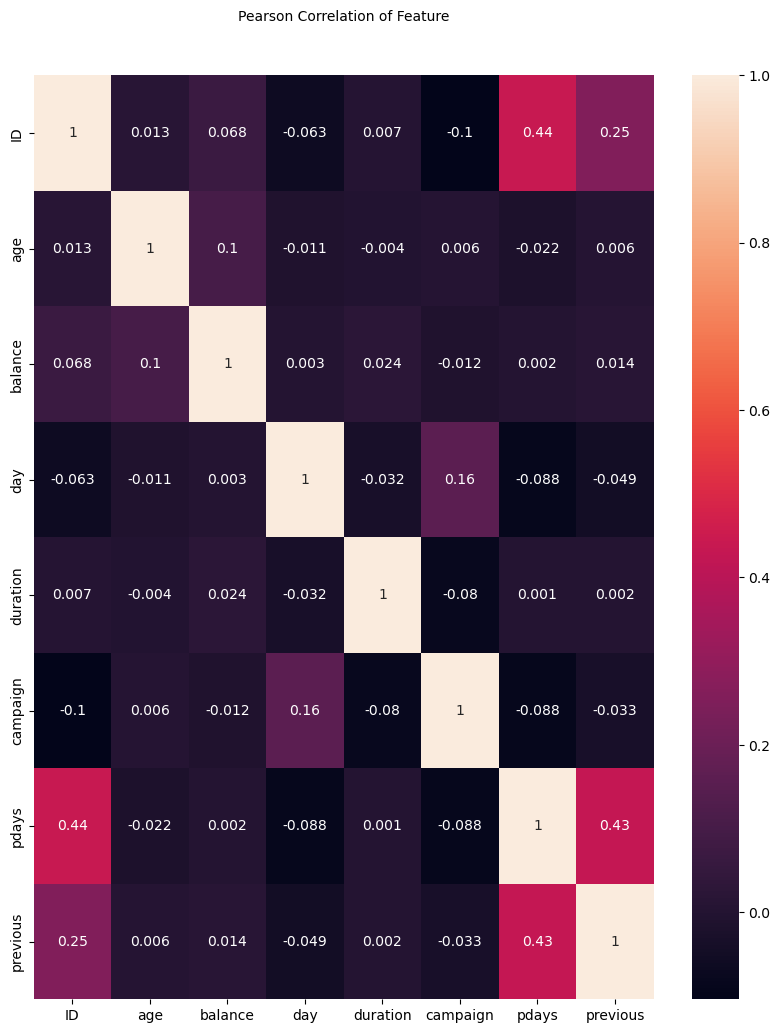

In [13]:
plt.figure(figsize=(10,12))
ax=sns.heatmap(corr, annot=True)
plt.title('Pearson Correlation of Feature',y=1.05,size=10)

In [14]:
#drop marital and contact columns
Bank.drop(['marital'],axis=1, inplace=True)
Bank.drop(['contact'],axis=1, inplace=True)
Bank.head()

,ID,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,unknown,no,1933,no,no,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,secondary,no,3,no,no,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,secondary,no,891,yes,no,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,tertiary,no,3287,no,no,22,jun,867,1,84,3,success,yes
4,29842,31,technician,secondary,no,119,yes,no,4,feb,380,1,-1,0,unknown,no


In [15]:
Bank.shape

(31647, 16)

In [32]:
Bank[['default','housing','loan','subscribed']]=Bank[['default','housing','loan','subscribed']].replace(["yes","no"],["1","0"])
Bank['month']=Bank['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
Bank['job']=Bank['job'].replace(['unknown'],['other'])


Bank.head()

,ID,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,3,0,1933,0,0,19,11,44,2,-1,0,3,0
1,40576,31,5,1,0,3,0,0,20,7,91,2,-1,0,3,0
2,15320,27,8,1,0,891,1,0,18,7,240,1,-1,0,3,0
3,43962,57,4,2,0,3287,0,0,22,6,867,1,84,3,2,1
4,29842,31,10,1,0,119,1,0,4,2,380,1,-1,0,3,0


In [33]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
Bank['job']=Le.fit_transform(Bank['job'])

Bank['education']=Le.fit_transform(Bank['education'])

Bank['poutcome']=Le.fit_transform(Bank['poutcome'])

In [34]:
Bank.head()

,ID,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,3,0,1933,0,0,19,11,44,2,-1,0,3,0
1,40576,31,5,1,0,3,0,0,20,7,91,2,-1,0,3,0
2,15320,27,8,1,0,891,1,0,18,7,240,1,-1,0,3,0
3,43962,57,4,2,0,3287,0,0,22,6,867,1,84,3,2,1
4,29842,31,10,1,0,119,1,0,4,2,380,1,-1,0,3,0


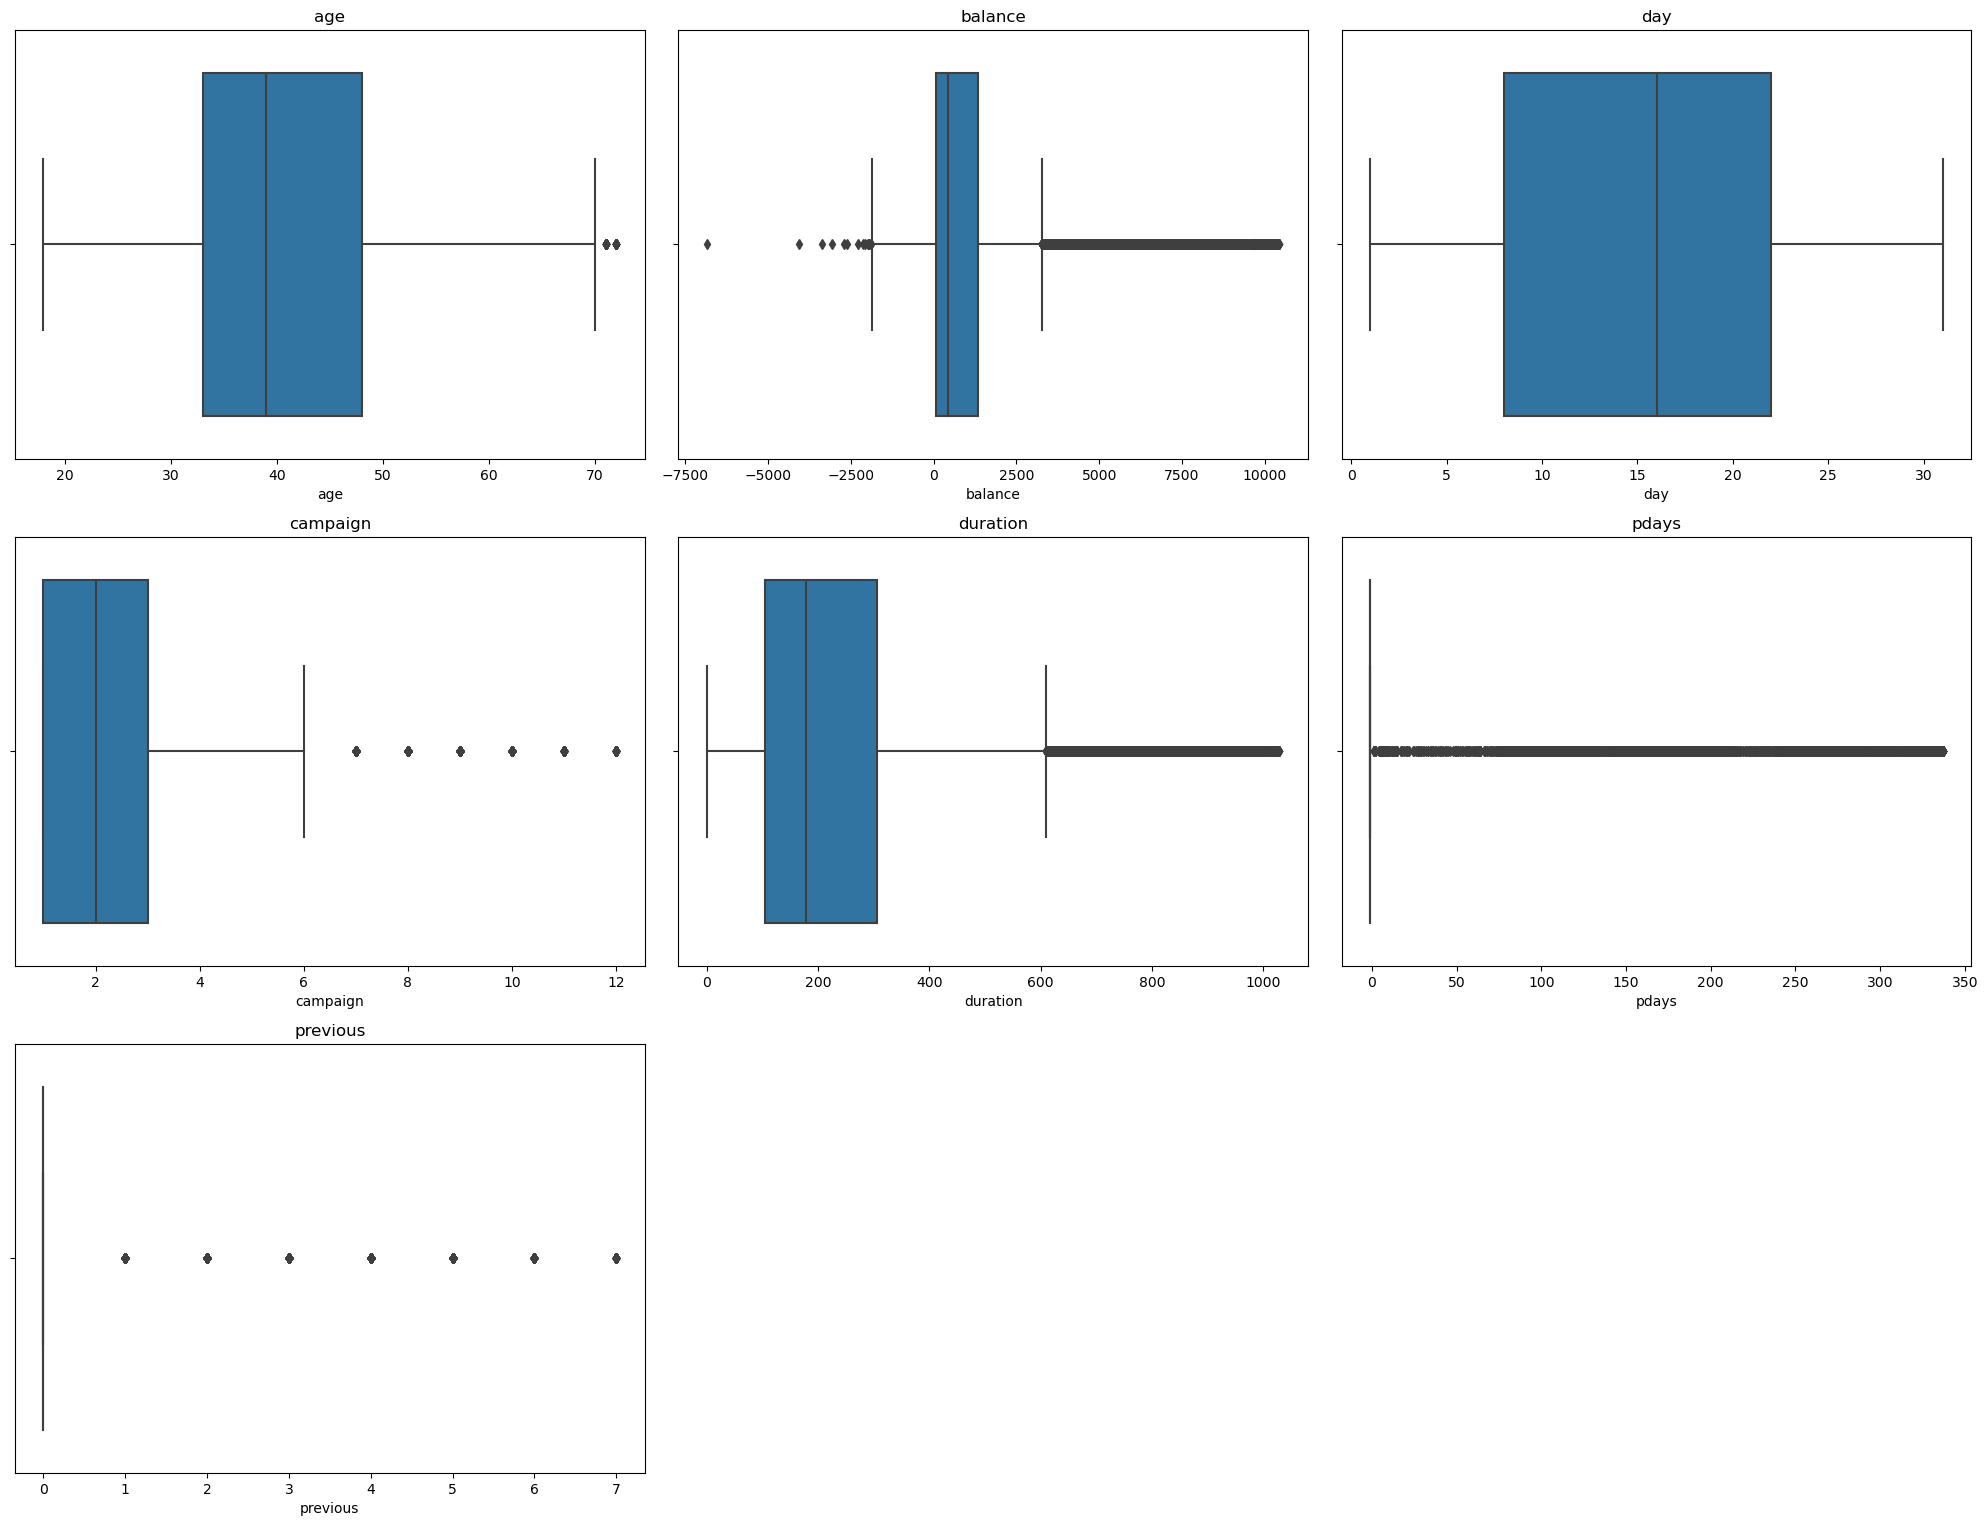

In [35]:
col_names = ['age', 'balance', 'day', 'campaign', 'duration', 'pdays', 'previous']

plt.figure(figsize=(20, 20))
n = 1

for i in col_names:
    plt.subplot(4, 3, n)
    sns.boxplot(data=Bank, x=i)
    plt.title(i)
    n += 1

plt.tight_layout()
plt.show()

In [36]:
from scipy import stats
import numpy as np
z= np.abs(stats.zscore(Bank[['age','balance','duration','campaign','pdays','previous']]))
print(z)
Bank=Bank[(z<3).all(axis=1)]
Bank.shape

            age   balance  duration  campaign     pdays  previous
0      1.522811  0.494277  1.008335  0.235510  0.361901  0.330792
1      0.957368  0.628157  0.761252  0.235510  0.361901  0.330792
2      1.354197  0.111721  0.022055  0.752080  0.361901  0.330792
3      1.622018  1.281726  3.318250  0.752080  0.846358  2.536730
4      0.957368  0.560694  0.758047  0.752080  0.361901  0.330792
...         ...       ...       ...       ...       ...       ...
31640  0.233118  1.096204  1.081934  0.797632  0.361901  0.330792
31641  0.362125  0.131376  1.083987  0.235510  0.361901  0.330792
31642  1.155782  0.629901  0.629825  0.235510  0.361901  0.330792
31643  1.225189  0.408904  1.062959  0.235510  0.361901  0.330792
31644  0.858161  0.448451  1.045135  0.281061  0.361901  0.330792

[28124 rows x 6 columns]


(24412, 16)

In [37]:
#Checking Outliers removals

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


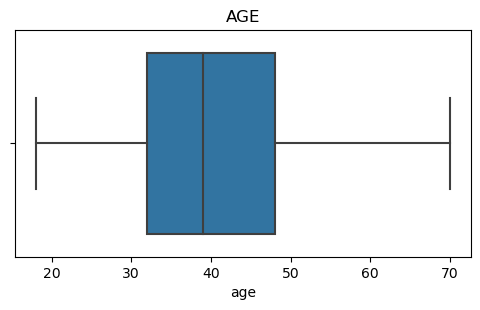

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(Bank['age'])
plt.title("AGE")
plt.show()

In [39]:
x=Bank.drop(['subscribed'],axis=1)
y=Bank['subscribed']

In [40]:
#Handling imbalancing data

<AxesSubplot:xlabel='subscribed', ylabel='count'>

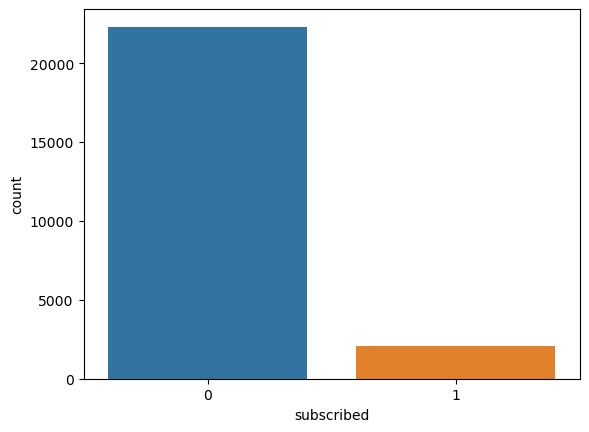

In [41]:
sns.countplot(x='subscribed',data=Bank)

In [42]:
#Random Over Sampling

In [43]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [44]:
import imblearn
from imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=42)
x_new,y_new=sm.fit_resample(x,y)

Original dataset shape Counter({'0': 22313, '1': 2099})
Resample dataset shapeCounter({'0': 22313, '1': 22313})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subscribed', ylabel='count'>

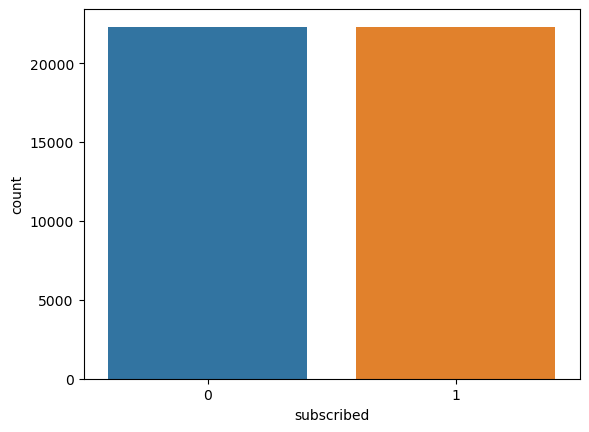

In [45]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resample dataset shape{}'. format(Counter(y_new)))
sns.countplot(y_new)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling

(35700, 15) (8926, 15) (35700,) (8926,)


In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [49]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score


model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [50]:
pred

array(['0', '1', '1', ..., '0', '0', '1'], dtype=object)

In [51]:
acc=accuracy_score(ytest,pred)
acc

0.8453954738964822

In [52]:
# Convert class labels to integers
ytest_int = ytest.astype(int)
pred_int = pred.astype(int)

# Calculate recall score
recall = recall_score(ytest_int, pred_int)
print("Recall:", recall)

Recall: 0.8638814016172507


In [53]:
precision=precision_score(ytest_int,pred_int)
precision

0.8324675324675325

In [54]:
f1score=f1_score(ytest_int,pred_int)
f1score

0.8478835978835979

In [55]:
AUC=roc_auc_score(pred,ytest)
AUC

0.8458668363684619

In [56]:
print("ROC_AUC Score:",AUC)

ROC_AUC Score: 0.8458668363684619


[[3700  774]
 [ 606 3846]]


<AxesSubplot:>

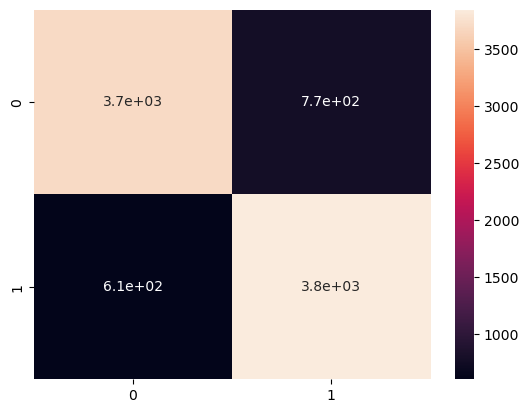

In [57]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True)

In [58]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      4306
           1       0.86      0.83      0.85      4620

    accuracy                           0.85      8926
   macro avg       0.85      0.85      0.85      8926
weighted avg       0.85      0.85      0.85      8926



In [59]:
a = model.predict_proba(x)
a.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


(24412, 2)